<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Example Problem-Decision Tree-Blue or Red

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the file
mydata=pd.read_csv("BlueOrRed.csv")
mydata.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [ ]:
Y=mydata["Undecided"]
X=mydata.iloc[:,1:9]
print(Y.head())
print(X.head())

0    1
1    1
2    1
3    0
4    0
Name: Undecided, dtype: int64
   Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  Church
0   51          1       1        1              4   171.0         15       0
1   37          1       1        1              3    96.0         18       0
2   53          1       1        1              6    86.0         20       0
3   33          1       1        1              2   176.0         18       1
4   46          1       1        1              6   420.0         15       1


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
X_train.shape

(7000, 8)

clf_tree=DecisionTreeClassifier(criterion="gini",max_depth=6)
clf_tree.fit(X,Y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier()
clf_tree=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf_tree.fit(X_train,Y_train)
tree_predict=clf_tree.predict(X_train)
round(accuracy_score(Y_train,tree_predict),3)
pred_prob=clf_tree.predict_proba(X_train)


[Text(167.4, 190.26, 'X[6] <= 12.5\nentropy = 0.479\nsamples = 7000\nvalue = [4211, 2789]'),
 Text(83.7, 135.9, 'X[5] <= 217.5\nentropy = 0.042\nsamples = 2092\nvalue = [2047, 45]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 36.5\nentropy = 0.039\nsamples = 2004\nvalue = [1964, 40]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.014\nsamples = 549\nvalue = [545, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.048\nsamples = 1455\nvalue = [1419, 36]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 219.0\nentropy = 0.107\nsamples = 88\nvalue = [83, 5]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.088\nsamples = 87\nvalue = [83, 4]'),
 Text(251.10000000000002, 135.9, 'X[7] <= 0.5\nentropy = 0.493\nsamples = 4908\nvalue = [2164, 2744]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.336\nsamples = 2420\nvalue = [518, 1902]'),
 Text(188.32500000000002, 27.18000000000

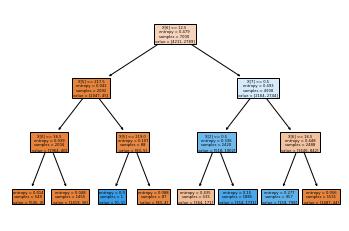

In [ ]:
from sklearn import tree
tree.plot_tree(clf_tree,filled=True)

In [ ]:
confusion_matrix(Y_train,tree_predict)

array([[3898,  313],
       [ 259, 2530]], dtype=int64)

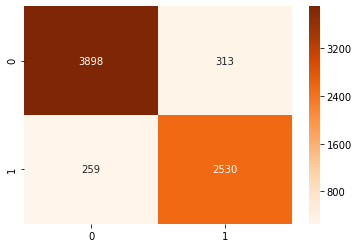

In [ ]:
cm=confusion_matrix(Y_train,tree_predict)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,tree_predict)
print((Report))  

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4211
           1       0.89      0.91      0.90      2789

    accuracy                           0.92      7000
   macro avg       0.91      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [ ]:
importances=clf_tree.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.000101,0.0,0.12428,0.0,0.0,0.000844,0.670336,0.204439


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"criterion":["gini","entropy"],
                  "max_depth":range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [ ]:
clf.best_score_

0.9797917532917727

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [ ]:
prediction=tree_predict
Prediction=pd.DataFrame(prediction)
Prediction
Prediction=Prediction.iloc[:,1:9]

In [ ]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob
pred_class=(pred_prob[1]>=0.5).astype(np.int)    

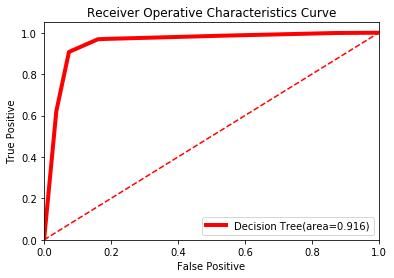

In [ ]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_train.head()
pred_class
dt_auc=roc_auc_score(Y_train.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr, label="Decision Tree(area=%0.3f)" % dt_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operative Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier()
clf_tree=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf_tree.fit(X_train,Y_train)
tree_predict=clf_tree.predict(X_test)
round(accuracy_score(Y_test,tree_predict),3)
pred_prob=clf_tree.predict_proba(X_test)


[Text(167.4, 190.26, 'X[6] <= 12.5\nentropy = 0.479\nsamples = 7000\nvalue = [4211, 2789]'),
 Text(83.7, 135.9, 'X[5] <= 217.5\nentropy = 0.042\nsamples = 2092\nvalue = [2047, 45]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 36.5\nentropy = 0.039\nsamples = 2004\nvalue = [1964, 40]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.014\nsamples = 549\nvalue = [545, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.048\nsamples = 1455\nvalue = [1419, 36]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 219.0\nentropy = 0.107\nsamples = 88\nvalue = [83, 5]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.088\nsamples = 87\nvalue = [83, 4]'),
 Text(251.10000000000002, 135.9, 'X[7] <= 0.5\nentropy = 0.493\nsamples = 4908\nvalue = [2164, 2744]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.336\nsamples = 2420\nvalue = [518, 1902]'),
 Text(188.32500000000002, 27.18000000000

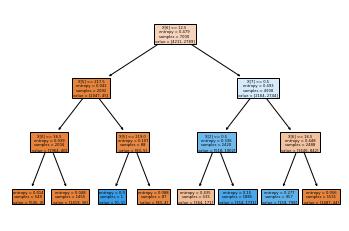

In [ ]:
from sklearn import tree
tree.plot_tree(clf_tree,max_depth=3,filled=True)

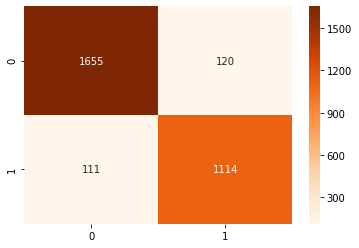

In [ ]:
cm=confusion_matrix(Y_test,tree_predict)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_test,tree_predict)
print((Report))  

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1775
           1       0.90      0.91      0.91      1225

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [ ]:
importances=clf_tree.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.000101,0.0,0.12428,0.0,0.0,0.000844,0.670336,0.204439
